# Imports

## Main packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

## Classification scores

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error


## Clustering packages and pips

In [3]:
!pip install kmedoids
# k-medoids installations are done inside "K-medoids block"

In [70]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB


# Reading data

In [5]:
categorical_data = pd.read_csv("categorical_mental_health_data.csv", sep = ",", index_col = 0)
data_numeric = pd.read_csv("only_numeric_mental_health_data.csv", sep = ",", index_col = 0)

# Creating Artificial Labels for Our Dataset (using t-SNE and K-means)

In [6]:
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000)
TSNEdata = tsne.fit_transform(data_numeric)

In [7]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(TSNEdata)


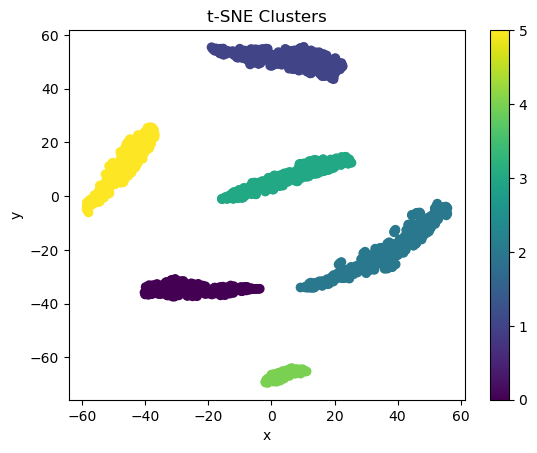

In [8]:
plt.scatter(TSNEdata[:, 0], TSNEdata[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [9]:
# Added column for predicitions (y_true)

data_numeric["labels"] = cluster_labels
categorical_data["labels"] = cluster_labels

# Applying Models

### Creating x_train, x_test, y_train and y_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_numeric.drop("labels", axis =1), data_numeric.labels, test_size = 0.25, random_state = 22)

## DBSCAN

In [11]:
clustering = DBSCAN(eps=5, min_samples=10).fit(data_numeric)

In [12]:
DBSCAN_clusters = clustering.labels_
set(clustering.labels_)

{-1, 0, 1, 2, 3, 4, 5}

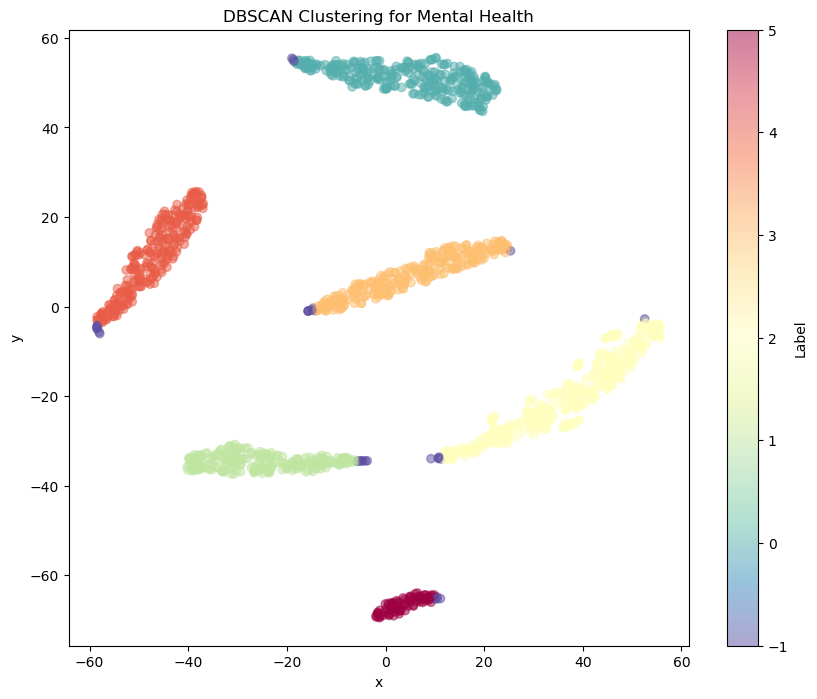

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(TSNEdata[:, 0], TSNEdata[:, 1], c=DBSCAN_clusters, cmap="Spectral_r", alpha=0.5)
plt.title('DBSCAN Clustering for Mental Health')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Label')
plt.show()

### Measuring performance

In [14]:
silhouette_avg = silhouette_score(data_numeric.drop("labels", axis=1), DBSCAN_clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6906190356085179


## Decision Tree

In [15]:
decision_tree = tree.DecisionTreeClassifier()
fitting = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.9, 'X[1] <= 9.0\ngini = 0.815\nsamples = 1074\nvalue = [167, 206, 257, 193, 59, 192]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0, 0, 0]'),
 Text(0.625, 0.7, 'X[1] <= 875.0\ngini = 0.778\nsamples = 817\nvalue = [167, 206, 0, 193, 59, 192]'),
 Text(0.5, 0.5, 'X[1] <= 181.5\ngini = 0.716\nsamples = 624\nvalue = [167, 206, 0, 0, 59, 192]'),
 Text(0.25, 0.3, 'X[26] <= 0.25\ngini = 0.495\nsamples = 373\nvalue = [167, 206, 0, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 167\nvalue = [167, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 206\nvalue = [0, 206, 0, 0, 0, 0]'),
 Text(0.75, 0.3, 'X[26] <= 0.75\ngini = 0.36\nsamples = 251\nvalue = [0, 0, 0, 0, 59, 192]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 192\nvalue = [0, 0, 0, 0, 0, 192]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 59\nvalue = [0, 0, 0, 0, 59, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 193\nvalue = [0, 0, 0, 193, 0, 0]')]

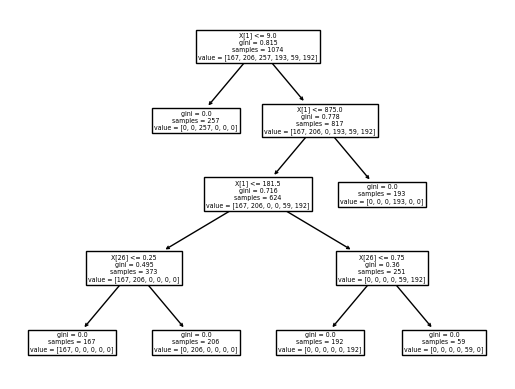

In [16]:
# Visualizing the tree

tree.plot_tree(fitting)

In [17]:
y_pred = fitting.predict(X_test)

### Measuring performance


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy}")

Accuracy of Decision Tree: 0.9972144846796658


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# that one wrong predicted is the outlier identified later by PCA (index = 564)

Confusion Matrix:
 [[42  0  0  0  0  0]
 [ 0 86  0  0  0  0]
 [ 1  0 90  0  0  0]
 [ 0  0  0 63  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 56]]


In [20]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      1.00      1.00        86
           2       1.00      0.99      0.99        91
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        56

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



## K-medoids

In [21]:
!pip install pyclustering

In [22]:
from pyclustering.cluster import kmedoids
from pyclustering.cluster.kmedoids import kmedoids

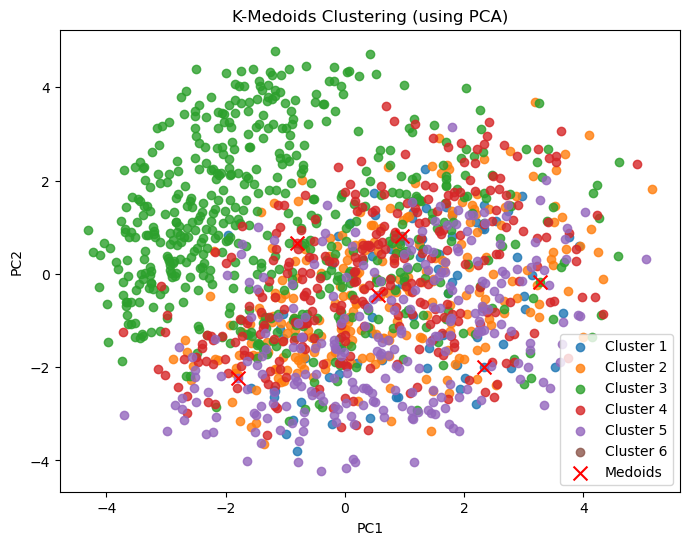

In [23]:
k = 6
data_numeric_array = data_numeric.drop("labels", axis = 1).to_numpy()

# Visualizing by Using PCA (standardizing it first)
scaler = StandardScaler()
standard_x = scaler.fit_transform(data_numeric_array)

# Performing PCA for dimensionality reduction
pca = PCA(n_components=2)
data_numeric_pca = pca.fit_transform(standard_x)

# Creating KMedoids
initial_medoids = np.random.randint(0, len(data_numeric_array), k)
kmedoids_instance = kmedoids(data_numeric_array, initial_medoids)

# Clustering part
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster_index, cluster in enumerate(clusters):
    cluster_points = data_numeric_pca[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_index + 1}', alpha=0.8)
plt.scatter(data_numeric_pca[medoids, 0], data_numeric_pca[medoids, 1], c='red', marker='x', s=100, label='Medoids')
plt.title('K-Medoids Clustering (using PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [24]:
# To visualize it better using t-SNE, some modifications were needed to be done

kmedoids_clus = []

for i in data_numeric.index:
    for cluster_index, cluster in enumerate(clusters):
        if i in cluster:
            kmedoids_clus.append(cluster_index + 1) # as enumerate starts from 0 when clusters start from 1


print(kmedoids_clus)

[4, 3, 3, 3, 3, 5, 4, 5, 4, 3, 4, 2, 2, 2, 2, 2, 4, 1, 3, 2, 3, 5, 4, 3, 3, 2, 4, 2, 1, 3, 2, 2, 5, 3, 4, 2, 4, 2, 2, 5, 3, 2, 5, 3, 5, 3, 3, 3, 3, 3, 4, 3, 3, 5, 1, 5, 4, 2, 3, 2, 5, 4, 4, 3, 3, 3, 3, 5, 2, 4, 3, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 2, 5, 3, 3, 3, 2, 4, 4, 3, 2, 1, 2, 3, 4, 4, 3, 4, 5, 3, 3, 2, 4, 5, 3, 3, 4, 4, 4, 2, 3, 1, 4, 3, 4, 3, 3, 3, 3, 2, 4, 5, 3, 1, 5, 5, 5, 4, 4, 2, 2, 3, 4, 1, 4, 4, 3, 4, 3, 3, 5, 5, 3, 3, 2, 3, 4, 2, 4, 5, 1, 3, 5, 2, 5, 5, 5, 5, 5, 3, 5, 4, 2, 3, 5, 3, 4, 4, 4, 3, 2, 3, 2, 3, 1, 4, 3, 2, 2, 5, 1, 1, 3, 4, 3, 5, 4, 2, 3, 1, 5, 2, 4, 1, 1, 2, 3, 1, 4, 3, 2, 1, 2, 3, 2, 1, 3, 1, 4, 1, 5, 4, 4, 2, 3, 2, 1, 4, 4, 4, 2, 4, 5, 1, 1, 5, 4, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 5, 3, 5, 1, 5, 1, 4, 4, 3, 3, 4, 4, 1, 4, 4, 4, 5, 5, 2, 4, 4, 4, 2, 4, 3, 4, 5, 4, 3, 1, 2, 5, 3, 4, 5, 2, 3, 3, 2, 2, 2, 1, 3, 1, 3, 4, 4, 3, 2, 2, 3, 5, 2, 5, 3, 1, 5, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 3, 2, 3, 4, 3, 3, 4, 3, 3, 2, 4, 4, 3, 4, 4, 

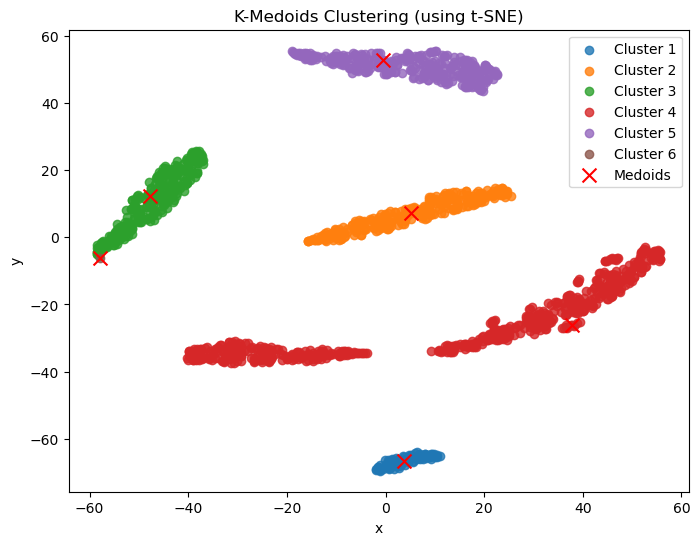

In [25]:
# Visualizing by t-SNE

k = 6 # our num of clusters (predetermined)
data_numeric_array = data_numeric.drop("labels", axis = 1).to_numpy()

# using t-sne as pca does not work good
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000)
data_numeric_tsne = tsne.fit_transform(data_numeric_array)

initial_medoids = np.random.randint(0, len(data_numeric_array), k)
kmedoids_instance = kmedoids(data_numeric_array, initial_medoids)

kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

plt.figure(figsize=(8, 6))
for cluster_index, cluster in enumerate(clusters):
    cluster_points = data_numeric_tsne[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_index + 1}", alpha=0.8)
plt.scatter(data_numeric_tsne[medoids, 0], data_numeric_tsne[medoids, 1], c='red', marker='x', s=100, label='Medoids')
plt.title('K-Medoids Clustering (using t-SNE)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Measuring performance

In [26]:
silhouette_avg = silhouette_score(data_numeric.drop("labels", axis=1), kmedoids_clus)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8480839921157212


# KNN (K-nearest Neighbors)

In [27]:
# KNN by using PCA visualization
X = categorical_data.drop('labels', axis=1)
y = categorical_data['labels']

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

C:\Users\XX12\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\XX12\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


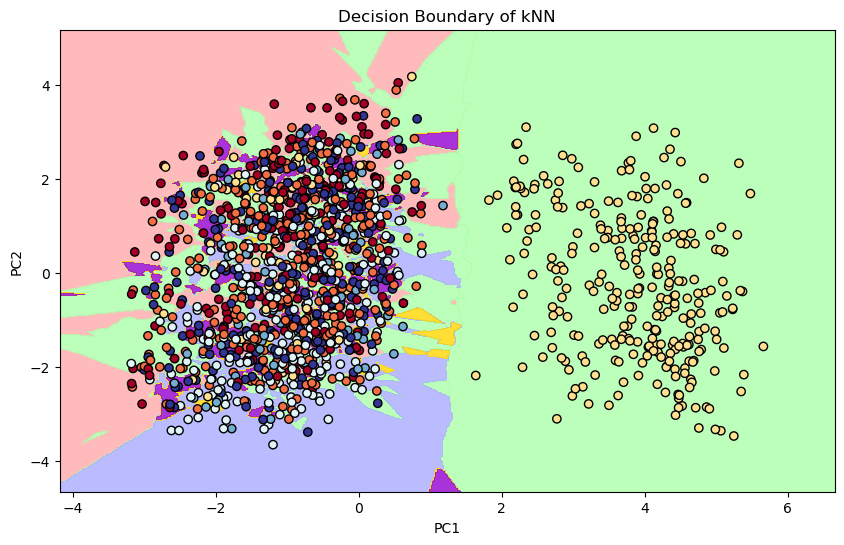

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#9400D3'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary of kNN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Measuring Performance



In [29]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55        38
           1       0.41      0.53      0.46        66
           2       0.95      0.82      0.88        66
           3       0.66      0.66      0.66        50
           4       0.33      0.05      0.09        19
           5       0.30      0.27      0.29        48

    accuracy                           0.56       287
   macro avg       0.52      0.49      0.49       287
weighted avg       0.57      0.56      0.55       287



In [30]:
accuracy_score(y_test, y_pred)

0.5574912891986062

***

C:\Users\XX12\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[3 1 0 5 2 3 0 1 2 1 1 5 2 3 3 5 1 1 5 3 2 1 1 1 1 2 5 2 2 5 1 1 1 1 1 3 3
 0 3 3 1 0 3 3 0 1 0 3 3 1 5 2 2 0 5 3 5 2 5 1 3 3 1 2 1 2 3 0 1 1 5 5 3 3
 2 1 0 2 5 2 1 3 5 1 3 3 3 2 2 1 3 3 4 1 3 1 1 0 0 2 0 1 1 2 5 2 5 3 0 0 5
 1 1 0 3 0 1 5 2 2 2 2 5 1 1 0 1 0 1 1 5 2 0 1 1 3 0 5 5 3 0 3 1 2 2 0 1 3
 2 1 2 1 0 2 0 3 5 0 1 1 1 5 5 0 2 0 1 2 5 2 5 1 1 2 3 2 2 5 3 3 1 0 1 3 1
 1 3 2 0 1 0 0 3 0 1 2 0 0 5 0 0 4 2 1 1 1 5 0 3 2 0 1 0 1 2 5 5 0 2 1 1 1
 5 0 1 1 3 1 2 2 0 1 5 5 5 5 3 1 3 1 2 0 2 2 5 1 3 0 2 3 1 2 2 0 1 1 0 0 1
 4 3 0 1 1 2 2 5 5 1 5 5 5 1 3 3 1 2 1 2 3 2 0 3 1 2 2 1]
[3, 1, 0, 5, 2, 3, 0, 1, 2, 1, 1, 5, 2, 3, 3, 5, 1, 1, 5, 3, 2, 1, 1, 1, 1, 2, 5, 2, 2, 5, 1, 1, 1, 1, 1, 3, 3, 0, 3, 3, 1, 0, 3, 3, 0, 1, 0, 3, 3, 1, 5, 2, 2, 0, 5, 3, 5, 2, 5, 1, 3, 3, 1, 2, 1, 2, 3, 0, 1, 1, 5, 5, 3, 3, 2, 1, 0, 2, 5, 2, 1, 3, 5, 1, 3, 3, 3, 2, 2, 1, 3, 3, 4, 1, 3, 1, 1, 0, 0, 2, 0, 1, 1, 2, 5, 2, 5, 3, 0, 0, 5, 1, 1, 0, 3, 0, 1, 5, 2, 2, 2, 2, 5, 1, 1, 0, 1, 0, 1, 1, 5, 2, 0, 1, 1, 3, 0, 5, 5,

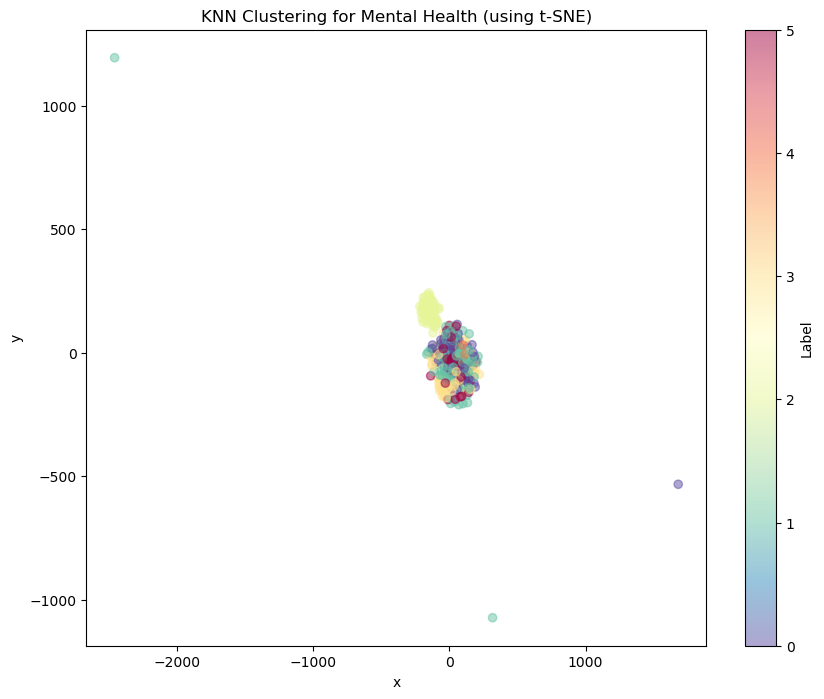

In [31]:
# Doing the same thing but visualized by t-SNE (better visualization for our particular data)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)
print(y_pred)
new_y_pred = ','.join(str(label) for label in y_pred)
y_pred = np.array(new_y_pred.split(','))
y_pred = [int(x) for x in y_pred]
print(y_pred)

tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=1000.0)
TSNEtest = tsne.fit_transform(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(TSNEtest[:, 0], TSNEtest[:, 1], c=y_pred, cmap="Spectral_r", alpha=0.5)
plt.title('KNN Clustering for Mental Health (using t-SNE)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Label')
plt.show()

# GMM (Gaussian Mixture Models)

In [32]:
X = data_numeric.select_dtypes(include=['number'])

n_components_range = range(2, 6)

best_silhouette_score = float("-inf")
best_n_components = 2

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_n_components = n_components

gmm = GaussianMixture(n_components=best_n_components, random_state=42)
labels = gmm.fit_predict(X)
data_numeric['cluster_label'] = labels

# data.to_csv('/content/numerical_mental_health_data.csv', index=False)


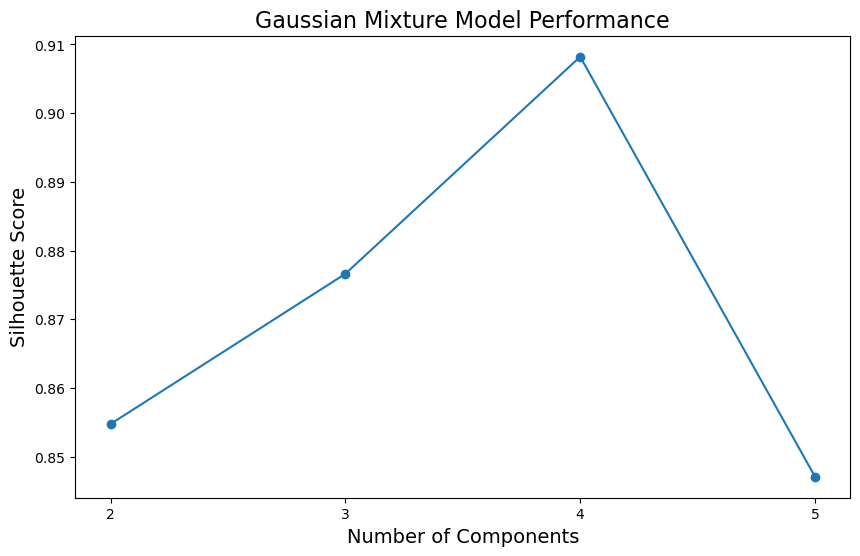

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = data_numeric.select_dtypes(include=['number'])

n_components_range = range(2, 6)

silhouette_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores for different number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Gaussian Mixture Model Performance", fontsize=16)
plt.xticks(np.arange(min(n_components_range), max(n_components_range)+1, 1))
plt.grid(False)
plt.show()

### Measuring Performance

In [34]:
print(f"Best number of components: {best_n_components}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best number of components: 4
Best Silhouette Score: 0.908217978100778


# Regressions (Lasso and Ridge)

In [35]:
label_map = {'Yes': 1, 'No': 0, 'Maybe': 0.5}
categorical_data['CurrentMentalHealthDisorder'] = categorical_data['CurrentMentalHealthDisorder'].map(label_map)

X = categorical_data.select_dtypes(include=['number'])
y = categorical_data['CurrentMentalHealthDisorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


### Measuring performance

In [36]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Mean Squared Error:", mse_lasso)

Ridge Mean Squared Error: 6.382811762850308e-06
Lasso Mean Squared Error: 0.19808045528206356


# Bagging

In [67]:
X.iloc[:, 1].unique()

array([  63,   15,    0, 1000,  300,  750,    3], dtype=int64)

In [37]:
labeled_data = pd.read_csv("data_mental_health_labeled.csv")

In [38]:
y = labeled_data.labels
X = labeled_data.drop("labels", axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [1, 2, 4, 6, 8, 10, 100]

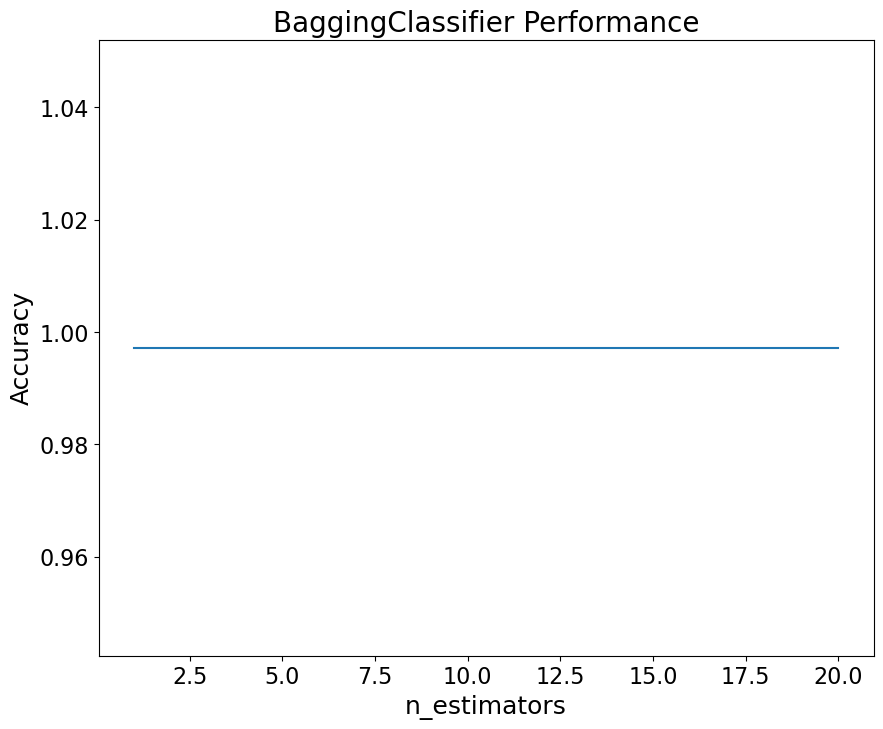

In [61]:
# default classifier for Bagging is Decision Tree Classifier

X_encoded = pd.get_dummies(data_numeric.drop("labels", axis=1))
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data_numeric['labels'], test_size=0.25, random_state=22)

estimator_range = range(1, 21)

models = []
scores = []

for n_estimators in estimator_range:
    bagging = BaggingClassifier(n_estimators=n_estimators, random_state=22)
    bagging.fit(X_train, y_train)
    models.append(bagging)
    scores.append(accuracy_score(y_true=y_test, y_pred=bagging.predict(X_test)))

# Plot the performance for different number of estimators
plt.figure(figsize=(10,8))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("BaggingClassifier Performance", fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(False)
plt.show()


### Measuring performance 

In [50]:
print(f"Accuracy Score of Bagging: {accuracy_score(y_test, y_pred)}")

Accuracy Score of Bagging: 0.9972144846796658


In [48]:
best_model_index = np.argmax(scores)
best_model = models[best_model_index]

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[42  0  0  0  0  0]
 [ 0 86  0  0  0  0]
 [ 1  0 90  0  0  0]
 [ 0  0  0 63  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      1.00      1.00        86
           2       1.00      0.99      0.99        91
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        56

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



# K-means

C:\Users\XX12\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\XX12\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


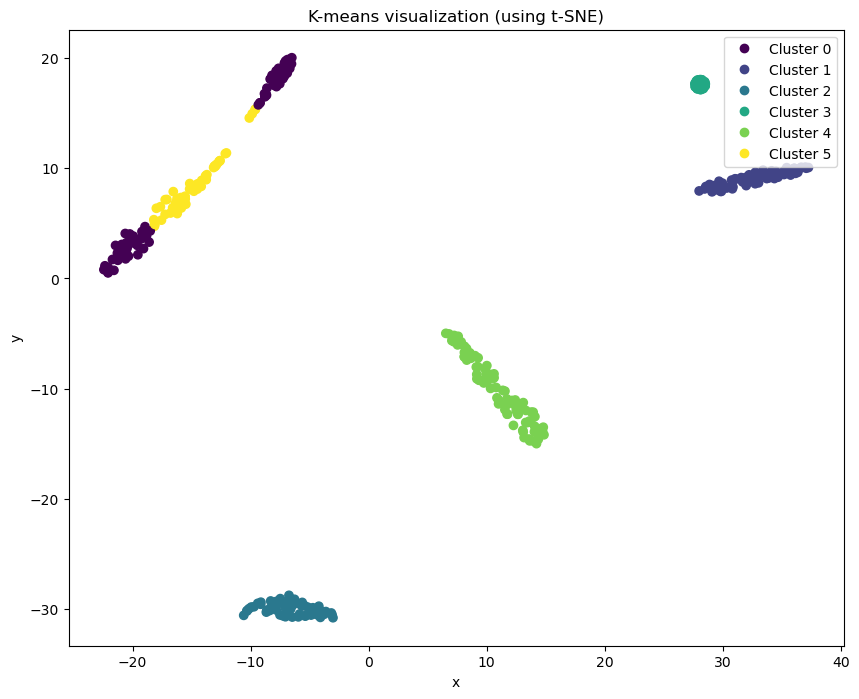

In [54]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_train)

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_test)

kmeans_labels = kmeans.predict(X_test)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(6)])
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means visualization (using t-SNE)')
plt.show()

### Measuring performance 

In [57]:
silhouette_avg = silhouette_score(X_test, kmeans_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7032140303865445


# Naive-Bayes 

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you already have your data loaded into 'data_categorical' and 'data_numeric'

# Numeric data with 'CurrentMentalHealthDisorder' as target
X_numeric_target = data_numeric.drop('CurrentMentalHealthDisorder', axis=1)
y_numeric_target = data_numeric['CurrentMentalHealthDisorder']

X_train_numeric_target, X_test_numeric_target, y_train_numeric_target, y_test_numeric_target = train_test_split(X_numeric_target, y_numeric_target, test_size=0.2, random_state=42)

# Convert continuous values to discrete class labels
y_train_numeric_target_discrete = pd.cut(y_train_numeric_target, bins=[-np.inf, 0.25, 0.75, np.inf], labels=['No', 'Maybe', 'Yes'])
y_test_numeric_target_discrete = pd.cut(y_test_numeric_target, bins=[-np.inf, 0.25, 0.75, np.inf], labels=['No', 'Maybe', 'Yes'])

# Fit the GNB classifier with the discrete class labels
clf_numeric_target = GaussianNB()
clf_numeric_target.fit(X_train_numeric_target, y_train_numeric_target_discrete)
y_pred_numeric_target = clf_numeric_target.predict(X_test_numeric_target)
accuracy_numeric_target = accuracy_score(y_test_numeric_target_discrete, y_pred_numeric_target)
print("Numeric data with 'CurrentMentalHealthDisorder' as target accuracy:")
print(accuracy_numeric_target)

# Numeric data with label as target
X_numeric_label = data_numeric.drop(['CurrentMentalHealthDisorder', 'labels'], axis=1)
y_numeric_label = data_numeric['labels']

X_train_numeric_label, X_test_numeric_label, y_train_numeric_label, y_test_numeric_label = train_test_split(X_numeric_label, y_numeric_label, test_size=0.2, random_state=42)

# Fit the GNB classifier with labels
clf_numeric_label = GaussianNB()
clf_numeric_label.fit(X_train_numeric_label, y_train_numeric_label)
y_pred_numeric_label = clf_numeric_label.predict(X_test_numeric_label)
accuracy_numeric_label = accuracy_score(y_test_numeric_label, y_pred_numeric_label)
print("\nNumeric data with label as target accuracy:")
print(accuracy_numeric_label)

# Categorical data with 'CurrentMentalHealthDisorder' as target
X_categorical_target = data_categorical.drop('CurrentMentalHealthDisorder', axis=1)
y_categorical_target = data_categorical['CurrentMentalHealthDisorder']

X_encoded_categorical_target = pd.get_dummies(X_categorical_target)

X_train_categorical_target, X_test_categorical_target, y_train_categorical_target, y_test_categorical_target = train_test_split(X_encoded_categorical_target, y_categorical_target, test_size=0.2, random_state=42)

# Convert continuous values to discrete class labels
y_train_categorical_target_discrete = pd.cut(y_train_categorical_target, bins=[-np.inf, 0.25, 0.75, np.inf], labels=['No', 'Maybe', 'Yes'])
y_test_categorical_target_discrete = pd.cut(y_test_categorical_target, bins=[-np.inf, 0.25, 0.75, np.inf], labels=['No', 'Maybe', 'Yes'])

# Fit the GNB classifier with the discrete class labels
clf_categorical_target = GaussianNB()
clf_categorical_target.fit(X_train_categorical_target, y_train_categorical_target_discrete)
y_pred_categorical_target = clf_categorical_target.predict(X_test_categorical_target)
accuracy_categorical_target = accuracy_score(y_test_categorical_target_discrete, y_pred_categorical_target)
print("\nCategorical data with 'CurrentMentalHealthDisorder' as target accuracy:")
print(accuracy_categorical_target)

# Categorical data with label as target
X_categorical_label = data_categorical.drop(['CurrentMentalHealthDisorder', 'labels'], axis=1)
y_categorical_label = data_categorical['labels']

X_encoded_categorical_label = pd.get_dummies(X_categorical_label)

X_train_categorical_label, X_test_categorical_label, y_train_categorical_label, y_test_categorical_label = train_test_split(X_encoded_categorical_label, y_categorical_label, test_size=0.2, random_state=42)

# Fit the GNB classifier with labels
clf_categorical_label = GaussianNB()
clf_categorical_label.fit(X_train_categorical_label, y_train_categorical_label)
y_pred_categorical_label = clf_categorical_label.predict(X_test_categorical_label)
accuracy_categorical_label = accuracy_score(y_test_categorical_label, y_pred_categorical_label)
print("\nCategorical data with label as target accuracy:")
print(accuracy_categorical_label)

Numeric data with 'CurrentMentalHealthDisorder' as target accuracy:
0.6585365853658537

Numeric data with label as target accuracy:
1.0

Categorical data with 'CurrentMentalHealthDisorder' as target accuracy:
0.3832752613240418

Categorical data with label as target accuracy:
0.9860627177700348


### Measuring performance 

In [73]:
# Numeric data with 'CurrentMentalHealthDisorder' as target
print("Classification Report for Numeric data with 'CurrentMentalHealthDisorder' as target:")
print(classification_report(y_test_numeric_target_discrete, y_pred_numeric_target))

# Numeric data with label as target
print("\nClassification Report for Numeric data with label as target:")
print(classification_report(y_test_numeric_label, y_pred_numeric_label))

# Categorical data with 'CurrentMentalHealthDisorder' as target
print("\nClassification Report for Categorical data with 'CurrentMentalHealthDisorder' as target:")
print(classification_report(y_test_categorical_target_discrete, y_pred_categorical_target))

# Categorical data with label as target
print("\nClassification Report for Categorical data with label as target:")
print(classification_report(y_test_categorical_label, y_pred_categorical_label))

Classification Report for Numeric data with 'CurrentMentalHealthDisorder' as target:
              precision    recall  f1-score   support

       Maybe       0.35      0.28      0.31        60
          No       0.75      0.66      0.70       106
         Yes       0.70      0.84      0.76       121

    accuracy                           0.66       287
   macro avg       0.60      0.60      0.59       287
weighted avg       0.65      0.66      0.65       287


Classification Report for Numeric data with label as target:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        48

    accuracy                           1.00       287
   macro avg       1.00      1.00     

# Finding Possible Outliers (in dataset)

## PCA (handling with outliers)


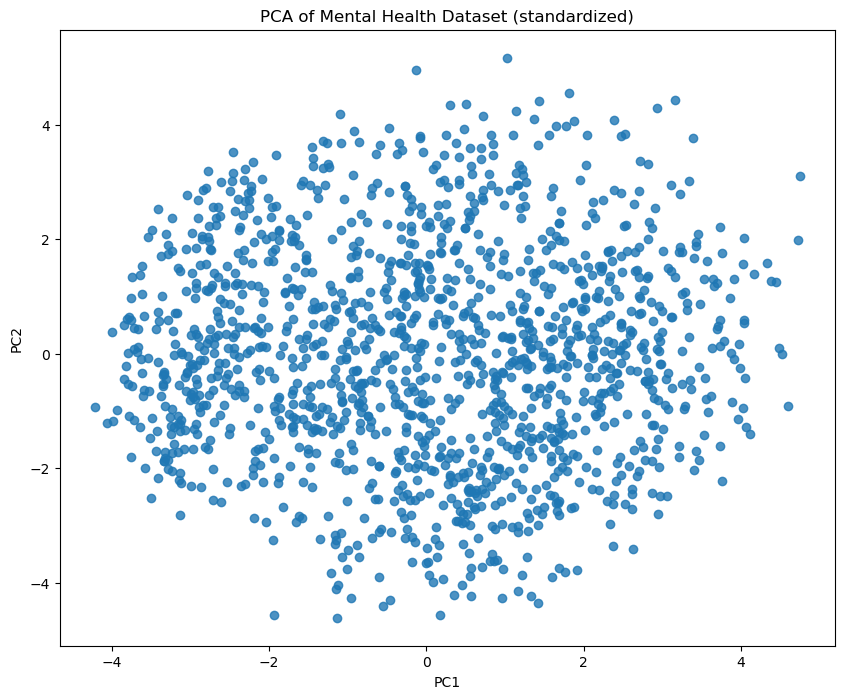

In [58]:
# in standardized version of dimensionality reduction we do not observe clear pattern of outliers (2 clusters are distinguishable)

scaler = StandardScaler()
standard_x = scaler.fit_transform(data_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(standard_x)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA of Mental Health Dataset (standardized)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

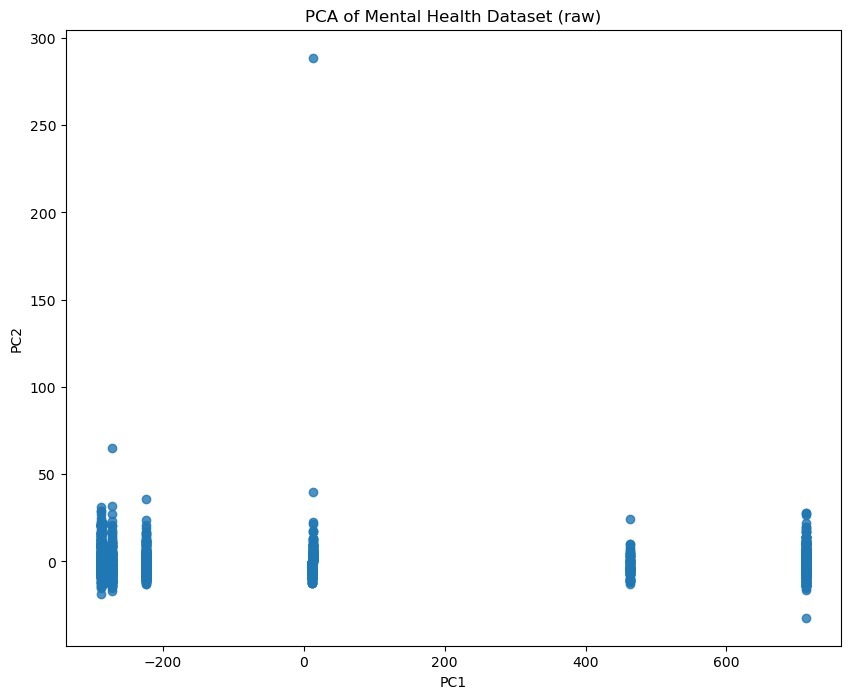

In [59]:
# In non-standardized form we observe one small obvious outlier

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_numeric.drop("labels", axis = 1))

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA of Mental Health Dataset (raw)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

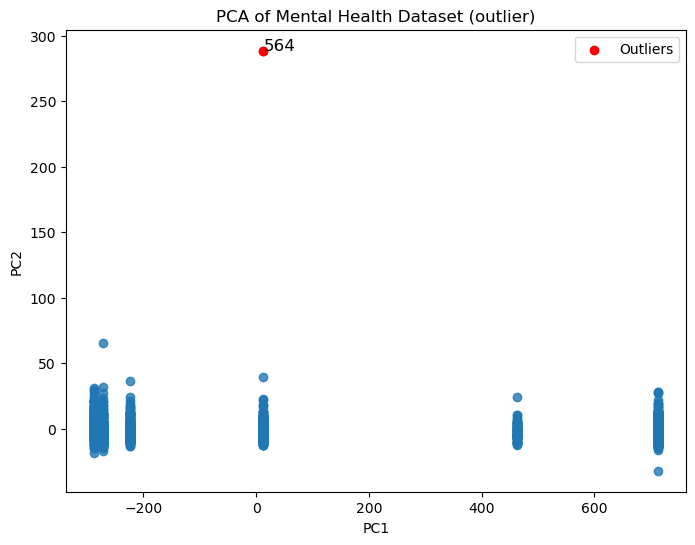

Index of the outlier: [564]


In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_numeric.drop("labels", axis = 1))

mean_score = np.mean(X_pca, axis=0)
std_score = np.std(X_pca, axis=0)
z_scores = np.abs((X_pca - mean_score) / std_score)

threshold = 6 # Experimenting with the threshold found that exact outlier
outliers_indices = np.where(z_scores > threshold)

# Finding the exact index
outliers_index_in_original_data = outliers_indices[0]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.scatter(X_pca[outliers_index_in_original_data, 0], X_pca[outliers_index_in_original_data, 1], color='red', label='Outliers')
for i in outliers_index_in_original_data:
    plt.text(X_pca[i, 0], X_pca[i, 1], str(i), fontsize=12, color='black')
plt.title('PCA of Mental Health Dataset (outlier)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

print("Index of the outlier:", outliers_index_in_original_data)

In [ ]:
# Just checking that particular value from the dataset
data_numeric.loc[564, :]

SelfEmployed                                                      0.00
NumEmployees                                                    300.00
TechCompany                                                       1.00
MentalHealthBenefits                                              1.00
EmployerDiscussedMentalHealth                                     0.50
ResourcesForMentalHealth                                          0.50
AnonymityProtected                                                0.50
MentalHealthMedicalLeave                                          0.50
DiscussMentalHealthWithSupervisor                                 0.50
EmployerTakeMentalHealthSeriously                                 0.50
IfRevealedNegativeImpact                                          0.25
MentalHealthNegativeProductivity                                  0.25
PreviousWork                                                      1.00
BringUpPhysicalHealthIssueInInterview                             1.00
BringU

***

#                                                THE            END